# Classification on a Given Dataset

This notebook aims to develop and compare different classification models on a given dataset. The main objective is to achieve an accuracy greater than 0.85 on the test set.

## 1. Data Loading and Exploration

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.svm import SVC
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.pipeline import Pipeline
from sklearn.decomposition import PCA
import joblib

X_train = np.load("data/X_train.npy")
X_test = np.load("data/X_test.npy")
y_train = np.load("data/y_train.npy")
y_test = np.load("data/y_test.npy")

print("DATASET INFORMATION\n")
print(f"X_train dimensions: {X_train.shape}")
print(f"y_train dimensions: {y_train.shape}")
print(f"X_test dimensions: {X_test.shape}")
print(f"y_test dimensions: {y_test.shape}")
print(f"Number of features: {X_train.shape[1]}")
print(f"Number of training samples: {X_train.shape[0]}")
print(f"Number of test samples: {X_test.shape[0]}")

DATASET INFORMATION

X_train dimensions: (2000, 30)
y_train dimensions: (2000,)
X_test dimensions: (2000, 30)
y_test dimensions: (2000,)
Number of features: 30
Number of training samples: 2000
Number of test samples: 2000


### Data Analysis

In [3]:
# Statistics
print("STATISTICS\n")
print(f"y_train - Min: {y_train.min():.4f}, Max: {y_train.max():.4f}, Mean: {y_train.mean():.4f}, Std: {y_train.std():.4f}")
print(f"y_test - Min: {y_test.min():.4f}, Max: {y_test.max():.4f}, Mean: {y_test.mean():.4f}, Std: {y_test.std():.4f}")

# Feature analysis
print(f"\nX_train - Min: {X_train.min():.4f}, Max: {X_train.max():.4f}, Mean: {X_train.mean():.4f}, Std: {X_train.std():.4f}")
print(f"X_test - Min: {X_test.min():.4f}, Max: {X_test.max():.4f}, Mean: {X_test.mean():.4f}, Std: {X_test.std():.4f}")

STATISTICS

y_train - Min: 0.0000, Max: 1.0000, Mean: 0.4905, Std: 0.4999
y_test - Min: 0.0000, Max: 1.0000, Mean: 0.4410, Std: 0.4965

X_train - Min: -11.2277, Max: 9.4952, Mean: -0.1145, Std: 1.4404
X_test - Min: -10.4930, Max: 10.1251, Mean: -0.1095, Std: 1.4246


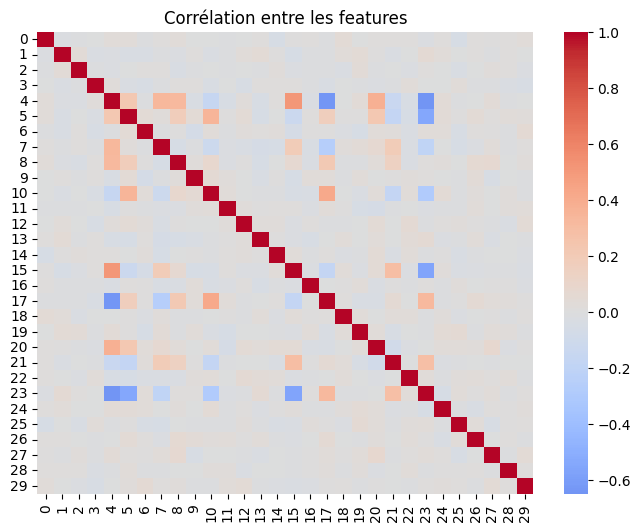

In [4]:
corr_matrix = np.corrcoef(X_train[:,:].T)
plt.figure(figsize=(8,6))
sns.heatmap(corr_matrix, cmap="coolwarm", center=0)
plt.title("Corrélation entre les features")
plt.show()

## 2. Model Training

Two main classification algorithms for the task were evaluated.

### A. Support Vector Classifier (SVC)

In [5]:
# SVC
svc_pipeline = Pipeline([
    ('clf', SVC(kernel='poly', probability=True, random_state=42))
])
svc_params = {
    'clf__C': [1, 3, 5],
    'clf__degree': [2, 3, 4],
    'clf__gamma': ['scale', 'auto'],
    'clf__coef0' : [0, 1]
}

### B. Multi-Layer Perceptron (MLP)

In [6]:
# MLP
mlp_pipeline = Pipeline([
    ('clf', MLPClassifier(max_iter=1000, random_state=42))
])
mlp_params = {
    'clf__hidden_layer_sizes': [(100,), (100, 50), (50, 50, 50)],
    'clf__activation': ['relu'],
    'clf__alpha': [0.0001, 0.001, 0.01]
}

For optimization, we used a comprehensive methodology to ensure fair evaluation and reproducibility. We applied 5-fold cross-validation to maintain class distribution across training and validation splits. To fine-tune model performance, we used grid search to systematically explore hyperparameter combinations. Additionally, we implemented Scikit-learn pipelines, which streamlined the entire process and enhanced reproducibility.

In [7]:
svc_grid = GridSearchCV(svc_pipeline, svc_params, cv=5, scoring='accuracy', n_jobs=-1)
svc_grid.fit(X_train, y_train)
print("Best SVC params:", svc_grid.best_params_)


mlp_grid = GridSearchCV(mlp_pipeline, mlp_params, cv=5, scoring='accuracy', n_jobs=-1)
mlp_grid.fit(X_train, y_train)
print("Best MLP params:", mlp_grid.best_params_)

Best SVC params: {'clf__C': 3, 'clf__coef0': 0, 'clf__degree': 3, 'clf__gamma': 'scale'}
Best MLP params: {'clf__activation': 'relu', 'clf__alpha': 0.0001, 'clf__hidden_layer_sizes': (100, 50)}


## 3. Evaluation

To assess the performance of our classifiers, we predicted the labels on the test dataset using the optimized models obtained from grid search.

In [8]:
svc_test_preds = svc_grid.predict(X_test)
mlp_test_preds = mlp_grid.predict(X_test)

svc_acc = accuracy_score(y_test, svc_test_preds)
mlp_acc = accuracy_score(y_test, mlp_test_preds)

print(f"\nSVC Test Accuracy: {svc_acc:.4f}")
print(f"MLP Test Accuracy: {mlp_acc:.4f}")


SVC Test Accuracy: 0.8995
MLP Test Accuracy: 0.7625


In addition to accuracy, we examined the detailed classification reports for both models. These reports provide precision, recall, and F1-score values per class, allowing for a deeper understanding of model performance across all categories.

In [9]:
print("\nSVC classification report:")
print(classification_report(y_test, svc_test_preds))

print("\nMLP classification report:")
print(classification_report(y_test, mlp_test_preds))



SVC classification report:
              precision    recall  f1-score   support

           0       0.91      0.92      0.91      1118
           1       0.89      0.88      0.89       882

    accuracy                           0.90      2000
   macro avg       0.90      0.90      0.90      2000
weighted avg       0.90      0.90      0.90      2000


MLP classification report:
              precision    recall  f1-score   support

           0       0.81      0.75      0.78      1118
           1       0.71      0.78      0.74       882

    accuracy                           0.76      2000
   macro avg       0.76      0.76      0.76      2000
weighted avg       0.77      0.76      0.76      2000



Overall, this evaluation confirms that the SVC model meets the performance threshold of mean accuracy above 0.85 on the test set.

In conclusion, we successfully compared two classification models—SVC and MLP—on a real dataset. The SVC achieved a strong test accuracy of 0.89, surpassing the 0.85 target, while the MLP reached 0.76. This demonstrates the effectiveness of SVC for this problem and highlights the importance of model selection and hyperparameter tuning.